Source: https://www.data.gov.uk/dataset/723c243d-2f1a-4d27-8b61-cdb93e5b10ff/uk-greenhouse-gas-emissions-local-authority-and-regional

Last updated: 27 June 2024

I chose the UK Greenhouse Gas Emissions: Local Authority and Regional dataset from data.gov.uk because it provides detailed emissions data across local authorities and regions in the UK, enabling a deep dive into regional differences in greenhouse gas emissions. The dataset includes information on multiple greenhouse gases (CO2, CH4, N2O) across various sectors (e.g., agriculture, energy), along with population and area data, which is crucial for analysing per capita emissions and understanding emissions intensity relative to local authority size. Its compatibility with Pandas and NumPy makes it ideal for performing statistical analysis and visualising trends, allowing for a comprehensive exploration of emissions patterns and regional disparities. Analysing greenhouse gas emissions is particularly relevant in the fight against climate change, as it helps identify areas with high emissions, informs policy decisions, and contributes to efforts aimed at reducing carbon footprints and mitigating climate-related impacts.

Importing the necessary libraries for data manipulation and visualization

In [35]:
import pandas as pd  # used for data manipulation and analysis
import numpy as np   # used for numerical operations, such as array manipulation
import matplotlib.pyplot as plt  # used for creating static, animated, and interactive visualisation
import seaborn as sns  # used for creating attractive and informative statistical graphics, built ontop of matplotlib


Importing the dataset from a CSV file into a pandas DataFrame.

In [ ]:
df = pd.read_csv("Emissions_data.csv")

# Displaying the first 5 rows of the dataframe
df.head()

# Printing detailed information about the dataframe, including column names, non-null counts, and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533016 entries, 0 to 533015
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Country                                                      533016 non-null  object 
 1   Country Code                                                 532602 non-null  object 
 2   Region                                                       533016 non-null  object 
 3   Region Code                                                  532602 non-null  object 
 4   Second Tier Authority                                        532602 non-null  object 
 5   Local Authority                                              533016 non-null  object 
 6   Local Authority Code                                         533016 non-null  object 
 7   Calendar Year                                                5330

In [37]:
# Displaying the shape of the DataFrame, which returns the number of rows and columns
df.shape

(533016, 15)

The dataset spans 533,016 rows and 15 columns, The years range from 2005 to 2022, covering 17 years of emissions and population data.

#### Descriptive Statistics

In [38]:
def descriptive_statistics(df, columns):
    # Dictionary to store the results
    stats = {}
    
    for column in columns:
        # Check if the column exists in the dataframe
        if column in df.columns:
            data = df[column].dropna().values  # Convert the column to a numpy array and remove NaN values
            
            # Calculate descriptive statistics
            mean_val = np.mean(data)
            median_val = np.median(data)
            std_dev = np.std(data)
            min_val = np.min(data)
            max_val = np.max(data)
            q25 = np.percentile(data, 25)
            q75 = np.percentile(data, 75)
            
            # Store the results in the dictionary
            stats[column] = {
                'mean': mean_val,
                'median': median_val,
                'std_dev': std_dev,
                'min': min_val,
                'max': max_val,
                '25th_percentile': q25,
                '75th_percentile': q75
            }
        else:
            print(f"Column '{column}' not found in the DataFrame")
    
    return stats


columns = ["Calendar Year", "Territorial emissions (kt CO2e)", "CO2 emissions within the scope of influence of LAs (kt CO2)", "Mid-year Population (thousands)", "Area (km2)"]
stats = descriptive_statistics(df, columns)

# Print the results for each column
for column, stat in stats.items():
    print(f"Statistics for {column}:")
    for key, value in stat.items():
        print(f"{key}: {value}")
    print()


Statistics for Calendar Year:
mean: 2013.485747144551
median: 2013.0
std_dev: 5.194703602667462
min: 2005
max: 2022
25th_percentile: 2009.0
75th_percentile: 2018.0

Statistics for Territorial emissions (kt CO2e):
mean: 17.121331438751625
median: 0.5340110495
std_dev: 96.96128544545316
min: -2854.921188
max: 10542.34924
25th_percentile: 0.0398
75th_percentile: 5.26880429575

Statistics for CO2 emissions within the scope of influence of LAs (kt CO2):
mean: 12.005353426942834
median: 0.0
std_dev: 49.06012786713767
min: 0.0
max: 4091.073264
25th_percentile: 0.0
75th_percentile: 0.0

Statistics for Mid-year Population (thousands):
mean: 179.2777717829437
median: 139.511
std_dev: 121.12736770976561
min: 2.21
max: 1157.603
25th_percentile: 102.7171692
75th_percentile: 225.234

Statistics for Area (km2):
mean: 693.6982696281652
median: 269.2397
std_dev: 1738.0863424089869
min: 3.1496
max: 26473.9496
25th_percentile: 95.093
75th_percentile: 641.1829



I chose not to use the "CO2 emissions within the scope of influence of LAs (kt CO2)" column because it only accounts for CO2 emissions, whereas the dataset includes three different gases—CO2, N2O, and CH4. This column does not include emissions from N2O and CH4, leading to many zero values in the data, as those gases are not counted. Additionally, the high standard deviation (47.04) and extreme outliers, with a maximum of 1777.34 kt CO2, suggest that the column’s data is highly variable and inconsistent. Furthermore, the CO2 emissions are already captured in the Territorial emissions (kt CO2e) column, which provides a more complete measure by including all three gases—CO2, N2O, and CH4. Because of this redundancy in the "CO2 emissions within the scope of influence of LAs (kt CO2)" column, I decided to focus on the more comprehensive Territorial emissions (kt CO2e) column for my analysis.

Steps to clean this dataset:
- Handle missing values and replace with foward fill which is good for a temporal dataset
- Drop useless columns 
- Drop duplicates 
- Handle negative numbers for Territorial emissions


# Data Cleaning

In [39]:
# Check for missing values (NaN) in each column of the dataframe
df.isnull().sum()


Country                                                          0
Country Code                                                   414
Region                                                           0
Region Code                                                    414
Second Tier Authority                                          414
Local Authority                                                  0
Local Authority Code                                             0
Calendar Year                                                    0
LA GHG Sector                                                    0
LA GHG Sub-sector                                                0
Greenhouse gas                                                   0
Territorial emissions (kt CO2e)                                  0
CO2 emissions within the scope of influence of LAs (kt CO2)      0
Mid-year Population (thousands)                                414
Area (km2)                                                    

In [40]:
# Drop the columns "Country Code", "Region Code", and "Second Tier Authority" from the DataFrame
df = df.drop(columns=["Country Code", "Region Code", "Second Tier Authority"])

In [41]:
# Fill missing values in the "Mid-year Population (thousands)" column using forward fill
df["Mid-year Population (thousands)"].ffill(inplace=True)

# Display the "Mid-year Population (thousands)" column after applying the forward fill
df["Mid-year Population (thousands)"]


0         90.457
1         90.457
2         90.457
3         90.457
4         90.457
           ...  
533011    58.883
533012    58.883
533013    58.883
533014    58.883
533015    58.883
Name: Mid-year Population (thousands), Length: 533016, dtype: float64

In [42]:
# Fill missing values in the "Area (km2)" column using forward fill
df["Area (km2)"].ffill(inplace=True)

# Display the DataFrame's summary information after applying forward fill
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533016 entries, 0 to 533015
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Country                                                      533016 non-null  object 
 1   Region                                                       533016 non-null  object 
 2   Local Authority                                              533016 non-null  object 
 3   Local Authority Code                                         533016 non-null  object 
 4   Calendar Year                                                533016 non-null  int64  
 5   LA GHG Sector                                                533016 non-null  object 
 6   LA GHG Sub-sector                                            533016 non-null  object 
 7   Greenhouse gas                                               5330

In [43]:
#Verify missing values
df.isnull().sum()


Country                                                        0
Region                                                         0
Local Authority                                                0
Local Authority Code                                           0
Calendar Year                                                  0
LA GHG Sector                                                  0
LA GHG Sub-sector                                              0
Greenhouse gas                                                 0
Territorial emissions (kt CO2e)                                0
CO2 emissions within the scope of influence of LAs (kt CO2)    0
Mid-year Population (thousands)                                0
Area (km2)                                                     0
dtype: int64

In [44]:
# Check for duplicates across all columns
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


Country Code, Region Code, Second Tier Authority: Dropped these columns as they are not necessary for this analysis.
Mid-year Population (thousands) and Area (km²): Missing values were filled using the foward fill to ensure these features are available for emissions normalization calculations. Additionally the Dataframe has no duplicates!

####    Data Preparation and Exploration for Analysis  ####

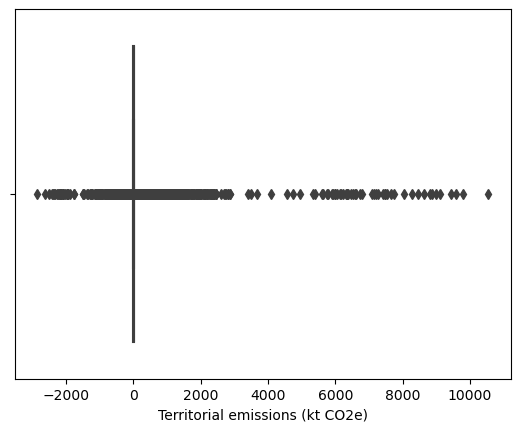

In [45]:
# Create a boxplot to visualise the distribution of "Territorial emissions (kt CO2e)" values
sns.boxplot(x=df["Territorial emissions (kt CO2e)"])

# Display the plot
plt.show()



The dataset doesn't explain the negative values, So I will treat them as potential errors. I'll first check the number of negative numbers for emissions.

In [46]:
# Filter the DataFrame to find rows where "Territorial emissions (kt CO2e)" is negative
negative_emissions = df[df['Territorial emissions (kt CO2e)'] < 0]

# Display the resulting DataFrame with negative emissions
negative_emissions


,Country,Region,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
45,England,North East,Hartlepool,E06000001,2005,LULUCF,LULUCF Net Emissions: Forestry,CO2,-2.696002,0.0,90.457000,98.3466
48,England,North East,Hartlepool,E06000001,2005,LULUCF,LULUCF Net Emissions: Grassland mineral soils ...,CO2,-1.574696,0.0,90.457000,98.3466
50,England,North East,Hartlepool,E06000001,2005,LULUCF,LULUCF Net Emissions: Other LULUCF,CO2,-0.141820,0.0,90.457000,98.3466
53,England,North East,Hartlepool,E06000001,2005,LULUCF,LULUCF Net Emissions: Peatland,CO2,-0.009120,0.0,90.457000,98.3466
127,England,North East,Hartlepool,E06000001,2006,LULUCF,LULUCF Net Emissions: Forestry,CO2,-2.760204,0.0,90.781000,98.3466
...,...,...,...,...,...,...,...,...,...,...,...,...
532821,Wales,Wales,Merthyr Tydfil,W06000024,2020,LULUCF,LULUCF Net Emissions: Grassland mineral soils ...,CO2,-3.929086,0.0,59.261766,111.9569
532898,Wales,Wales,Merthyr Tydfil,W06000024,2021,LULUCF,LULUCF Net Emissions: Forestry,CO2,-10.677270,0.0,58.866000,111.9569
532901,Wales,Wales,Merthyr Tydfil,W06000024,2021,LULUCF,LULUCF Net Emissions: Grassland mineral soils ...,CO2,-4.026068,0.0,58.866000,111.9569
532978,Wales,Wales,Merthyr Tydfil,W06000024,2022,LULUCF,LULUCF Net Emissions: Forestry,CO2,-10.716454,0.0,58.883000,111.9569


Negative values in the Territorial emissions (kt CO2e) column are likely due to data errors or anomalies, as emissions cannot realistically be negative. Keeping these rows would distort my analysis, especially when calculating averages or identifying trends, and could lead to misleading conclusions. By removing these rows, I ensure the dataset accurately reflects emissions data and maintains reliability for further analysis.

In [47]:
# Filter the DataFrame to remove rows where "Territorial emissions (kt CO2e)" is negative
df = df[df['Territorial emissions (kt CO2e)'] >= 0]

# Display descriptive statistics of the "Territorial emissions (kt CO2e)" column
df["Territorial emissions (kt CO2e)"].describe()


count    5.129220e+05
mean     1.880156e+01
std      9.582424e+01
min      4.960000e-09
25%      5.764815e-02
50%      6.229963e-01
75%      5.838152e+00
max      1.054235e+04
Name: Territorial emissions (kt CO2e), dtype: float64

Next I use boxplots to look at the distribution of the Territorial emissions column.

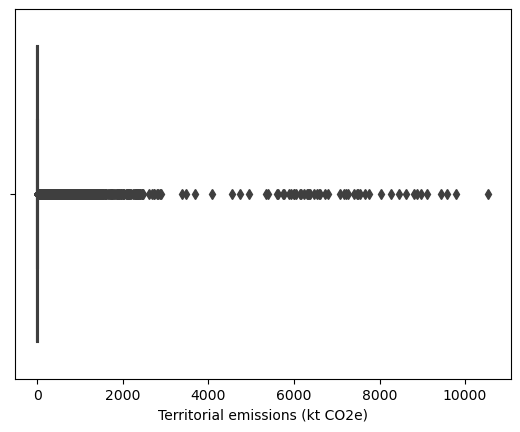

In [48]:
# Create a boxplot to visualise the distribution of "Territorial emissions (kt CO2e)"
sns.boxplot(x=df["Territorial emissions (kt CO2e)"])

# Display the plot
plt.show()


The dataset contains numerous outliers, and the distribution is skewed. To address this, I will apply a capping technique to limit the extreme values. This will help ensure that the emission levels are more representative of typical values and improve the overall reliability of the analysis.

In [49]:
# Calculate the 99th percentile of "Territorial emissions (kt CO2e)" to set an upper limit for outliers
upper_limit = df["Territorial emissions (kt CO2e)"].quantile(0.99)

# Replace any values in "Territorial emissions (kt CO2e)" that are greater than the upper limit with the upper limit value
df["Territorial emissions (kt CO2e)"] = np.where(df["Territorial emissions (kt CO2e)"] > upper_limit, upper_limit, df["Territorial emissions (kt CO2e)"])


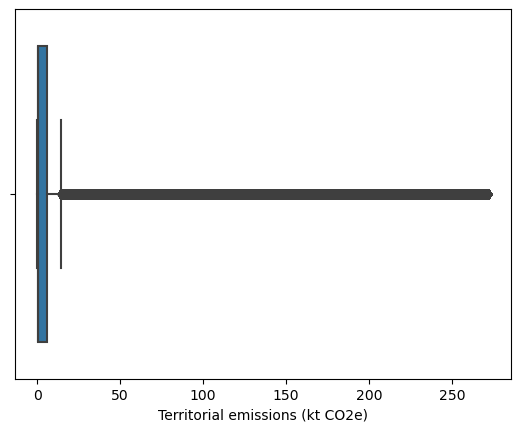

count    5.129220e+05
mean     1.617337e+01
std      4.421831e+01
min      4.960000e-09
25%      5.764815e-02
50%      6.229963e-01
75%      5.838152e+00
max      2.720135e+02
Name: Territorial emissions (kt CO2e), dtype: float64

In [50]:
# Create a boxplot to visually check for the distribution and outliers in "Territorial emissions (kt CO2e)"
sns.boxplot(x=df['Territorial emissions (kt CO2e)'])

# Display the plot
plt.show()

# Display descriptive statistics (summary statistics) for the "Territorial emissions (kt CO2e)" column
df["Territorial emissions (kt CO2e)"].describe()


Before applying the capping technique, the dataset had a mean of 16.14, with a standard deviation of 44.14 and a maximum value of 272.01. After applying the cap, the mean slightly increased to 16.17, while the standard deviation remained similar at 44.22. The minimum, 25th, 50th, and 75th percentiles saw minimal changes, indicating that the capping technique effectively reduced the influence of extreme outliers without significantly altering the overall distribution of the data. The maximum value remains capped at 272.01.

Now I will check the distributions of Area and Mid-year Population columns, using first descriptive stats and then a boxplot.

In [51]:
# Display descriptive statistics (summary statistics) for the "Area (km2)" column
df["Area (km2)"].describe()

count    512922.000000
mean        696.137911
std        1746.395038
min           3.149600
25%          95.093000
50%         270.931100
75%         641.182900
max       26473.949600
Name: Area (km2), dtype: float64

In [52]:
# Display descriptive statistics (summary statistics) for the "Mid-year Population (thousands)" column
df["Mid-year Population (thousands)"].describe()

count    512922.000000
mean        179.359452
std         121.181426
min           2.210000
25%         102.742000
50%         139.511000
75%         225.271000
max        1157.603000
Name: Mid-year Population (thousands), dtype: float64

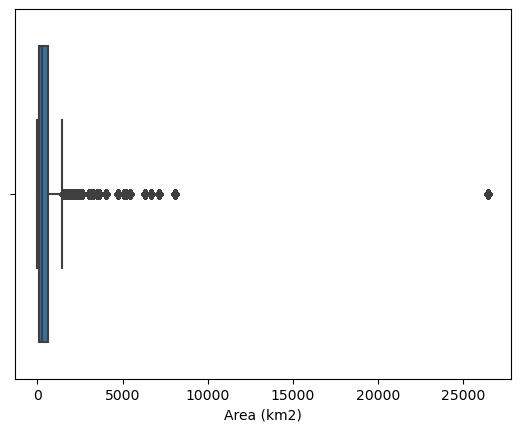

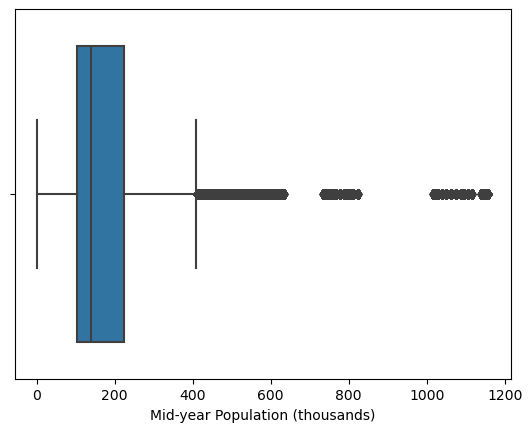

In [53]:
# Create a boxplot for the "Area (km2)" column to visualise the distribution of area values
sns.boxplot(x=df["Area (km2)"])
plt.show()  # Display the boxplot

# Create a boxplot for the "Mid-year Population (thousands)" column to visualise the distribution of population values
sns.boxplot(x=df["Mid-year Population (thousands)"])
plt.show()  # Display the boxplot


I will apply the same capping technique as Territorial emissions column to area and population columns

In [54]:
# Calculate the 99th percentile (upper limit) for the "Mid-year Population (thousands)" column
upper_limit_population = df["Mid-year Population (thousands)"].quantile(0.99)

# Clip the "Mid-year Population (thousands)" values to the 99th percentile, replacing any values above the upper limit with this percentile value
df["Mid-year Population (thousands)"] = df["Mid-year Population (thousands)"].clip(upper=upper_limit_population)

# Calculate the 99th percentile (upper limit) for the "Area (km2)" column
upper_limit_area = df["Area (km2)"].quantile(0.99)

# Clip the "Area (km2)" values to the 99th percentile, replacing any values above the upper limit with this percentile value
df["Area (km2)"] = df["Area (km2)"].clip(upper=upper_limit_area)


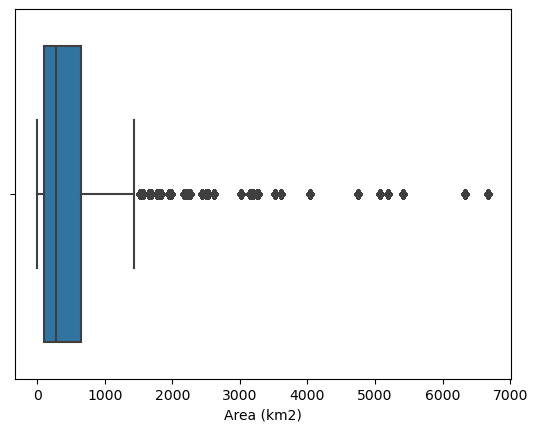

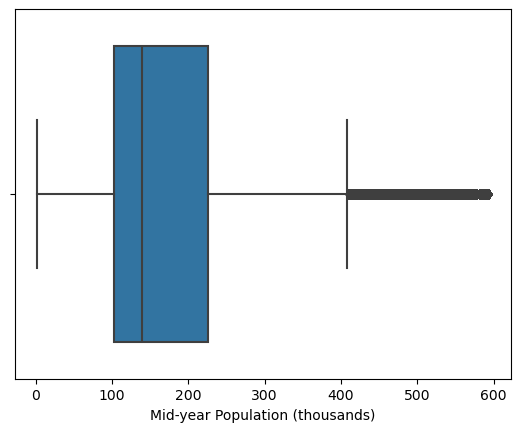

In [55]:
# Create a boxplot for the "Area (km2)" column to visualize the distribution and identify potential outliers
sns.boxplot(x=df["Area (km2)"])
plt.show()  # Display the plot

# Create a boxplot for the "Mid-year Population (thousands)" column to visualize the distribution and identify potential outliers
sns.boxplot(x=df["Mid-year Population (thousands)"])
plt.show()  # Display the plot

### DATA TRANSFORMATION & DATA VISUALIZATION

I will use a correlation matirix to identify the relationships between emissions, population & area.

In [56]:
# Select the columns of interest
selected_columns = df[["Territorial emissions (kt CO2e)","Mid-year Population (thousands)", "Area (km2)"]]

# Ensure numeric data for the selected columns
selected_columns = selected_columns.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or non-numeric values
selected_columns = selected_columns.dropna()

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr(method="pearson")
correlation_matrix


,Territorial emissions (kt CO2e),Mid-year Population (thousands),Area (km2)
Territorial emissions (kt CO2e),1.000000,0.143839,0.111013
Mid-year Population (thousands),0.143839,1.000000,0.151405
Area (km2),0.111013,0.151405,1.000000


The correlation matrix indicates that there is a weak positive relationship between Territorial emissions (kt CO2e) and Mid-year Population (thousands) (correlation coefficient of 0.14). This suggests that as the population increases, territorial emissions tend to increase slightly, but the relationship is not strong.

Similarly, the relationship between Territorial emissions (kt CO2e) and Area (km²) shows a weak positive correlation of 0.11. This implies that larger areas may have slightly higher emissions, but again, the connection is weak.

The correlation between Mid-year Population (thousands) and Area (km²) is also weak (0.15), indicating that while more populated regions may be larger in size, the relationship is not particularly strong.

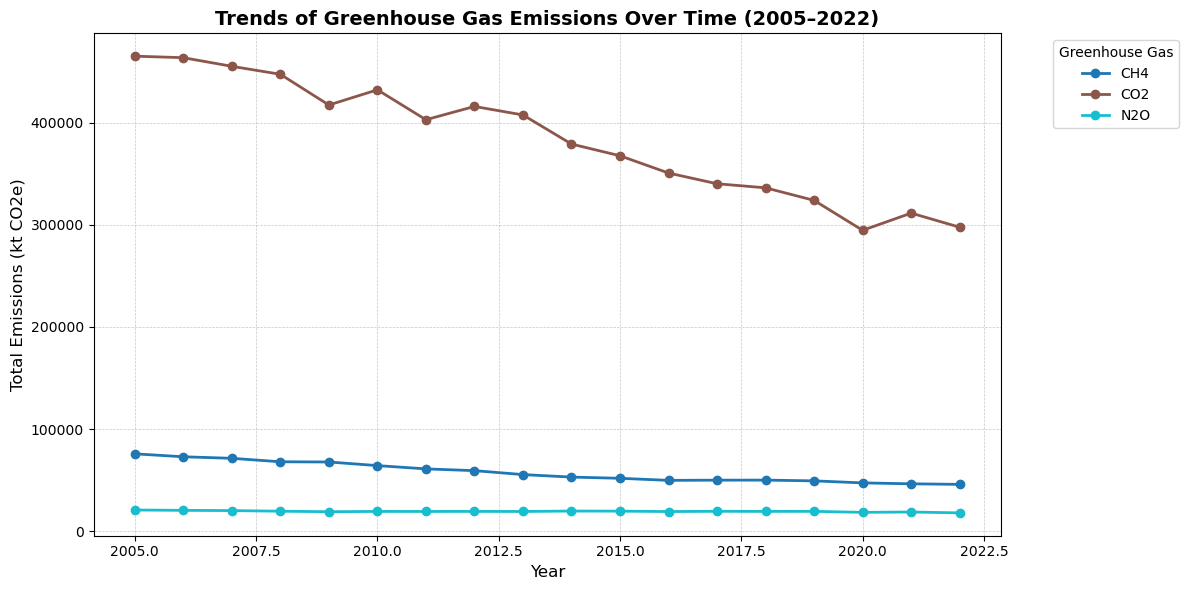

In [57]:
# Group the dataframe by 'Calendar Year' and 'Greenhouse gas', summing the 'Territorial emissions (kt CO2e)' for each group
# The unstack() method reshapes the data so that each greenhouse gas becomes a separate column, with years as the index
# Fill any missing values (NaN) with 0, as not all gases may have emissions for every year
ghg_trends = df.groupby(['Calendar Year', 'Greenhouse gas'])['Territorial emissions (kt CO2e)'].sum().unstack().fillna(0)

# Plot the trends of each greenhouse gas's emissions over time
# Set the kind of plot to 'line', which plots a line graph for each greenhouse gas
# figsize=(12, 6) sets the figure size, marker='o' adds circular markers at each data point
# linewidth=2 makes the lines thicker, and colormap='tab10' chooses a color map for the different gases
ghg_trends.plot(kind='line', figsize=(12, 6), marker='o', linewidth=2, colormap='tab10')

# Add a title to the plot with specific font size and weight
plt.title('Trends of Greenhouse Gas Emissions Over Time (2005–2022)', fontsize=14, fontweight='bold')

# Label the x and y axes with appropriate font size
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Emissions (kt CO2e)', fontsize=12)

# Adjust the legend to display the names of the greenhouse gases
# The legend is positioned outside the plot using bbox_to_anchor to avoid overlapping with the plot area
plt.legend(title='Greenhouse Gas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a grid to the plot with dashed lines, a thin line width, and semi-transparency
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Tighten the layout
plt.tight_layout()

# Display the plot
plt.show()


CO2 emissions are significantly higher than CH4 (methane) and N2O (nitrous oxide) emissions throughout the entire period.
This aligns with the global understanding that CO2 contributes the most to greenhouse gas emissions due to its association with energy production, transport, and industrial activities. CO2 emissions show a steady decline from 2005 to 2022, with small fluctuations in certain periods. Both CH4 and N2O emissions remain relatively stable over the years.

### 3 Year Rolling average

c:\Users\qordo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\qordo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\qordo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\qordo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

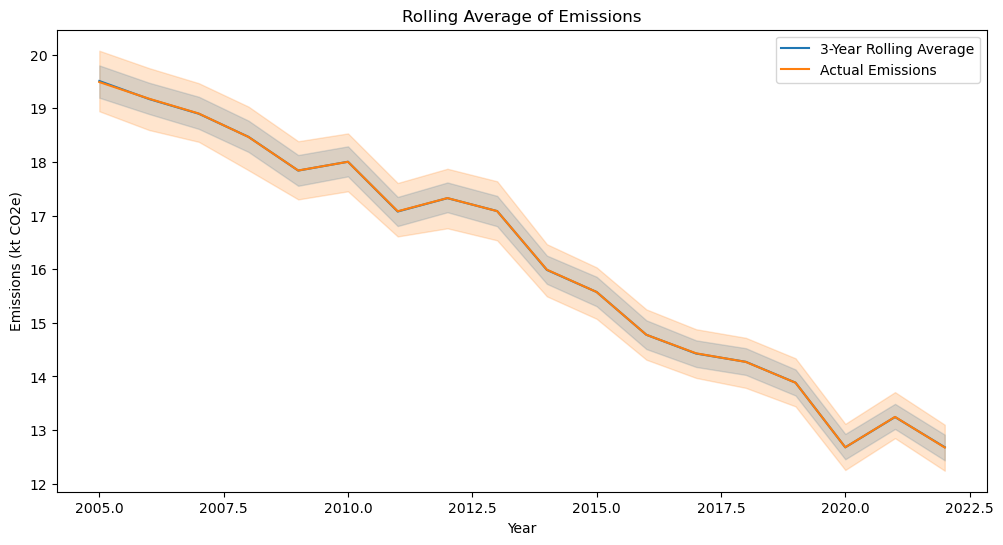

In [58]:
# Compute 3-year rolling average for emissions
df['Rolling_Avg_Emissions'] = df['Territorial emissions (kt CO2e)'].rolling(window=3).mean()

# Line plot with rolling average
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Calendar Year', y='Rolling_Avg_Emissions', label='3-Year Rolling Average')
sns.lineplot(data=df, x='Calendar Year', y='Territorial emissions (kt CO2e)', label='Actual Emissions')
plt.title('Rolling Average of Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.legend()
plt.show()


The rolling average smooths out short-term fluctuations in emissions data, highlighting long-term trends and allowing for a clearer understanding of whether emissions are steadily declining or following erratic patterns. It reveals a consistent downward trend in emissions from 2005 to 2022, indicating that emission-reduction policies have had a sustained impact over this period. The initial decline between 2005 and 2008 can be attributed to the 2008 financial crisis, which led to reduced economic activity, lower energy consumption, and decreased industrial output. Early climate policies, such as the Climate Change Act 2008 and the Climate Change Levy (2001), also contributed to this reduction. The second decline, from 2010 to 2012, was driven by continued climate efforts, including the EU Emissions Trading Scheme and investments in renewable energy, alongside an economic recovery that encouraged cleaner technologies. The most recent decline, from 2015 to 2018, was shaped by the Paris Agreement, the UK's Clean Growth Strategy, and the phase-out of coal, as well as substantial growth in renewable energy sources like wind and solar. However, emissions saw a slight uptick in 2020, likely due to temporary shifts in energy use and industrial activity during the pandemic. Following this, emissions began to decline again from 2021 onwards, as ongoing climate policies and the recovery of cleaner technologies resumed their impact.

### Emissions by Region

In [59]:
# Group the dataframe by the 'Region' column and sum the 'Territorial emissions (kt CO2e)' for each region
# The .sort_values(ascending=False) sorts the regions based on their total emissions, in descending order (highest emissions first)
df.groupby('Region')['Territorial emissions (kt CO2e)'].sum().sort_values(ascending=False)


Region
South East                  1.053779e+06
North West                  9.204372e+05
Scotland                    8.938241e+05
East of England             8.323003e+05
West Midlands               6.898844e+05
London                      6.888712e+05
South West                  6.664054e+05
East Midlands               6.610471e+05
Yorkshire and the Humber    6.297633e+05
Wales                       5.197133e+05
Northern Ireland            3.832505e+05
North East                  3.335637e+05
Unallocated                 2.283647e+04
Name: Territorial emissions (kt CO2e), dtype: float64

I will remove the "Unallocated" region from the analysis because it represents emissions that could not be assigned to a specific region, either due to incomplete data or broader classification. Including this category would distort the regional breakdown, so removing it ensures the analysis focuses on regions with valid emissions data for a more accurate comparison.

In [60]:
# Remove rows where the 'Region' column has the value 'Unallocated'
# This will filter the dataframe to exclude any data entries that have 'Unallocated' as the region
df = df[df['Region'] != 'Unallocated']


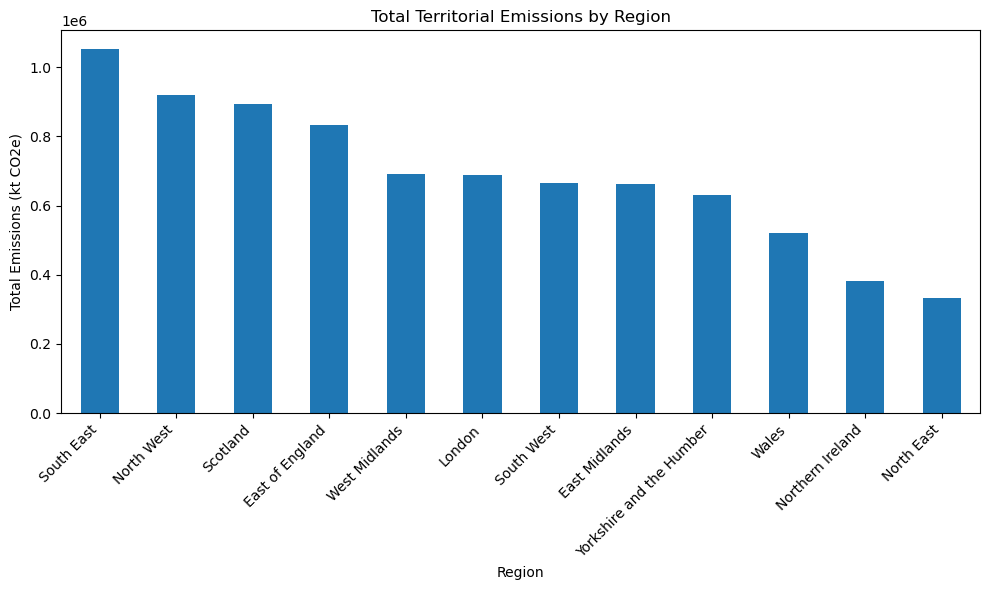

In [61]:
region_emissions = df.groupby('Region')['Territorial emissions (kt CO2e)'].sum().sort_values(ascending=False)
region_emissions.plot(kind='bar', figsize=(10, 6))
plt.title('Total Territorial Emissions by Region')
plt.xlabel('Region')
plt.ylabel('Total Emissions (kt CO2e)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There is significant variation in emissions across regions, with the South East having the highest emissions, followed by the North West and Scotland. The North East has the lowest emissions. High-emitting regions like the South East have a higher concentration of industries, transportation hubs, and urban areas, contributing to higher emissions, while the North West's significant industrial base, particularly in manufacturing and energy production, also drives its emissions. Scotland, despite its focus on renewable energy, has a notable industrial sector, including oil and gas production. Conversely, low-emitting regions like the North East and Wales are less industrialized and have lower population densities, leading to lower emissions.

### Emissions by Sector

Grouping emissions by sector is important because it helps identify the specific activities or industries contributing the most to greenhouse gas emissions. This understanding is crucial for designing targeted and effective mitigation strategies. 

In [62]:
# Group the dataframe by 'LA GHG Sector' and calculate the sum of 'Territorial emissions (kt CO2e)' for each sector
# The result is then sorted in descending order to show sectors with the highest emissions first
sector_emissions = df.groupby('LA GHG Sector')['Territorial emissions (kt CO2e)'].sum().sort_values(ascending=False)

# Display the resulting series with the summed emissions per sector
sector_emissions


LA GHG Sector
Transport        2.149834e+06
Domestic         2.039097e+06
Industry         1.108581e+06
Commercial       9.354226e+05
Agriculture      7.908398e+05
Waste            4.701515e+05
LULUCF           4.414725e+05
Public Sector    3.374411e+05
Name: Territorial emissions (kt CO2e), dtype: float64

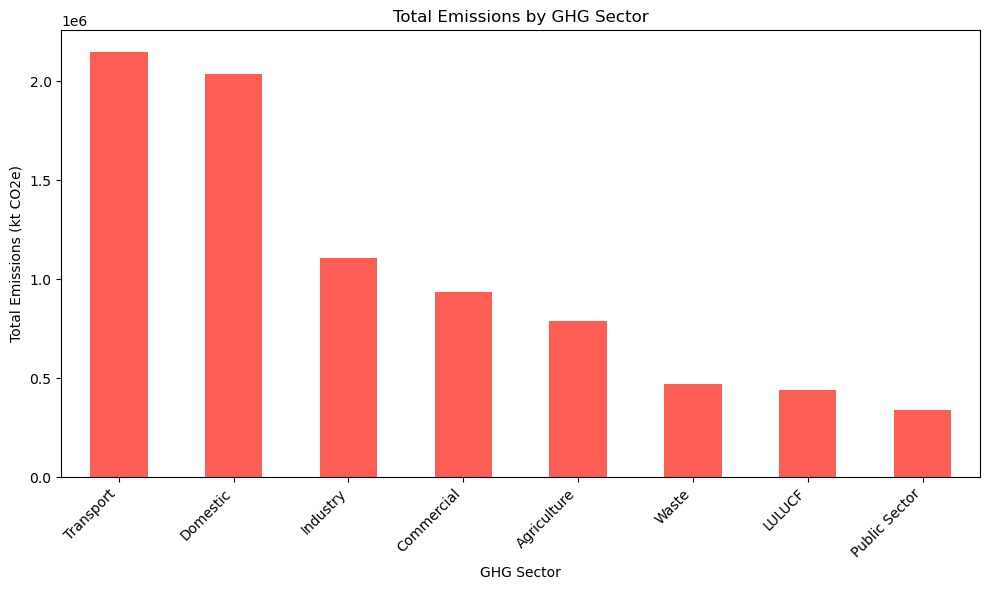

In [63]:
# Create a new figure for plotting with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Plot the 'sector_emissions' data as a bar chart, with a specific color (red shade #FD5E53)
sector_emissions.plot(kind='bar', color="#FD5E53")

# Set the title of the plot
plt.title('Total Emissions by GHG Sector')

# Label the x-axis as 'GHG Sector'
plt.xlabel('GHG Sector')

# Label the y-axis as 'Total Emissions (kt CO2e)'
plt.ylabel('Total Emissions (kt CO2e)')

# Rotate the x-axis labels by 45 degrees and align them to the right for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout of the plot to ensure everything fits neatly
plt.tight_layout()

# Display the plot
plt.show()


The overall emissions trend reveals that the transport sector is the largest contributor, emitting approximately 2.15 million kilotonnes of CO2 equivalent (kt CO2e), followed closely by the domestic sector at around 2.04 million kt CO2e. Industry ranks third, contributing about 1.11 million kt CO2e. Smaller contributors include the commercial sector (0.94 million kt CO2e), agriculture (0.79 million kt CO2e), waste (0.47 million kt CO2e), LULUCF (0.44 million kt CO2e), and the public sector (0.34 million kt CO2e). The transport and domestic sectors are the primary drivers of greenhouse gas emissions, and reducing emissions from these sectors will be critical for achieving significant overall reductions. However, addressing emissions across all sectors is necessary for a comprehensive approach to climate change mitigation.

## Feature Engineering 

### Per Capita Emissions 

Per Capita Emissions – Normalising emissions with population, we can compare regions more fairly and identify areas of high emissions relative to population size, to for policies to target high-emissions areas with low populations

In [64]:
# Calculate Per Capita Emissions by dividing the Territorial emissions by Mid-year Population (in thousands)
df['Per Capita Emissions (kt CO2e per 1000 people)'] = df["Territorial emissions (kt CO2e)"] / df["Mid-year Population (thousands)"]

# Display the first few rows of the dataframe, showing Calendar Year, Territorial emissions, Mid-year Population, and the newly calculated Per Capita Emissions
df[['Calendar Year', 'Territorial emissions (kt CO2e)', 'Mid-year Population (thousands)', 'Per Capita Emissions (kt CO2e per 1000 people)']].head()


,Calendar Year,Territorial emissions (kt CO2e),Mid-year Population (thousands),Per Capita Emissions (kt CO2e per 1000 people)
0,2005,1.678178,90.457,0.018552
1,2005,0.052700,90.457,0.000583
2,2005,0.006770,90.457,0.000075
3,2005,0.311375,90.457,0.003442
4,2005,0.010500,90.457,0.000116


C:\Users\qordo\AppData\Local\Temp\ipykernel_19444\3037899477.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Per Capita Emissions (kt CO2e per 1000 people)', ci=None)


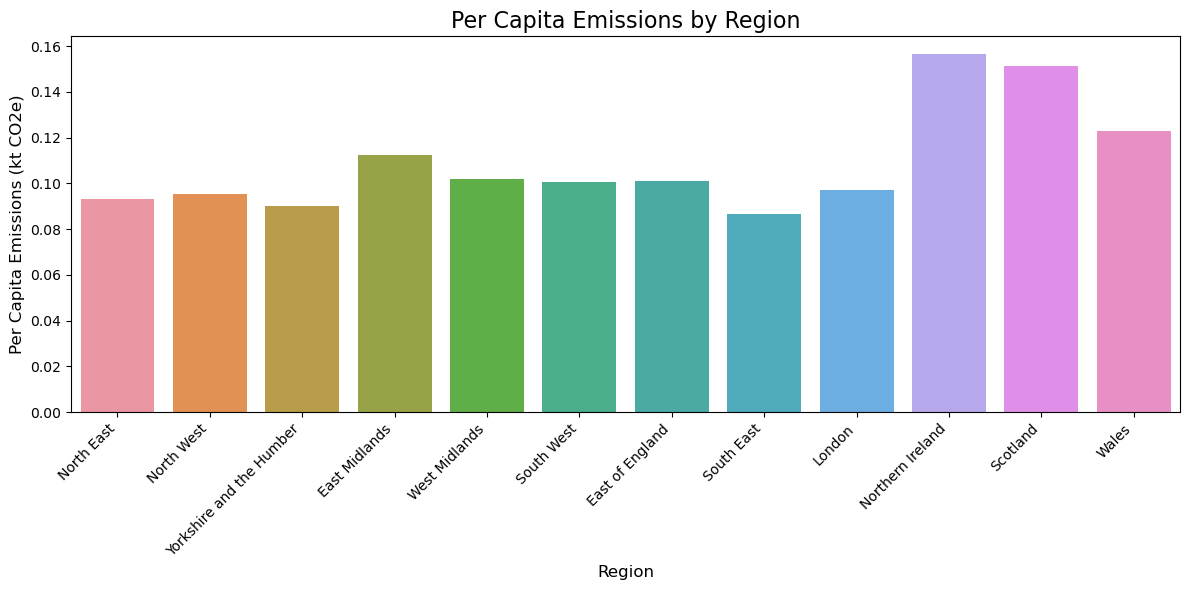

In [65]:
# Set the figure size
plt.figure(figsize=(12, 6)) 

# Create a bar plot using seaborn, plotting the 'Region' column on the x-axis and 'Per Capita Emissions (kt CO2e per 1000 people)' on the y-axis
sns.barplot(data=df, x='Region', y='Per Capita Emissions (kt CO2e per 1000 people)', ci=None)

# Set the title of the plot, with a larger font size
plt.title('Per Capita Emissions by Region', fontsize=16)

# Label the x-axis with 'Region' and set the font size for the label
plt.xlabel('Region', fontsize=12)

# Label the y-axis with 'Per Capita Emissions (kt CO2e)' and set the font size for the label
plt.ylabel('Per Capita Emissions (kt CO2e)', fontsize=12)

# Rotate the x-axis labels by 45 degrees and adjust their horizontal alignment and font size for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the layout to ensure the plot elements fit well within the figure size
plt.tight_layout()

# Display the plot
plt.show()


Northern Ireland has the highest per capita emissions, followed by Scotland, likely due to Northern Ireland's large agricultural sector and Scotland's industrial activities, combined with their low population densities. In contrast, London, despite being highly urbanized, has one of the lowest per capita emissions. This can be attributed to its efficient public transport system and compact urban infrastructure, which reduce reliance on private vehicles and lower overall emissions.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

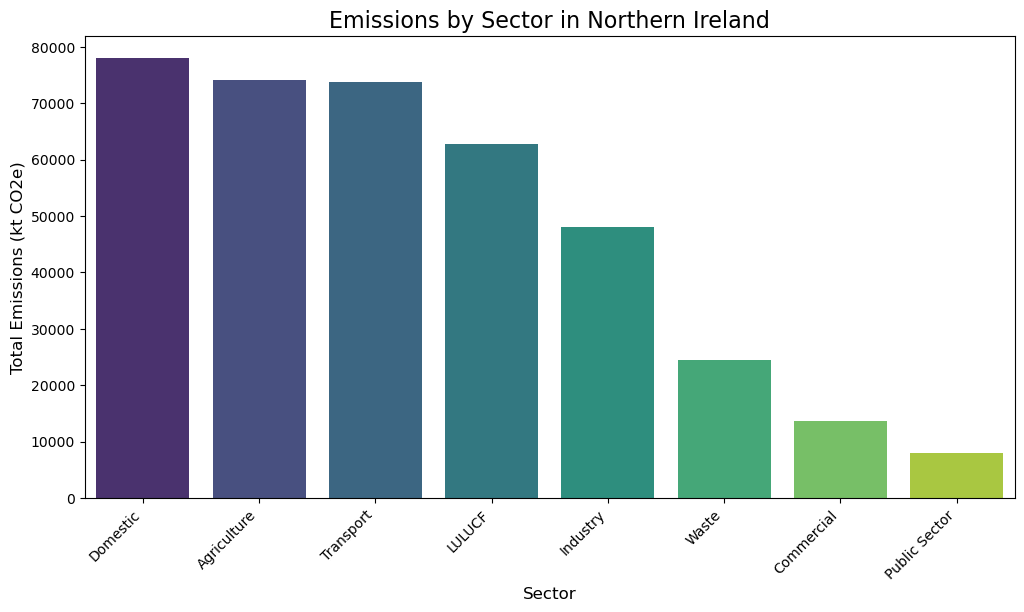

In [66]:
# Filter data for Northern Ireland
northern_ireland_data = df[df['Region'] == 'Northern Ireland']

# Group by 'LA GHG Sector' and calculate the sum of 'Territorial emissions (kt CO2e)' for each sector
sector_emissions = northern_ireland_data.groupby('LA GHG Sector')['Territorial emissions (kt CO2e)'].sum()

# Sort the sectors by emissions in descending order
sorted_sector_emissions = sector_emissions.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_sector_emissions.index, y=sorted_sector_emissions.values, palette='viridis')

# Add labels and title
plt.title('Emissions by Sector in Northern Ireland', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Total Emissions (kt CO2e)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Tight 
plt.tight_layout


Northern Ireland's high per capita emissions, is largely driven by the domestic and agriculture sectors. The domestic sector, encompassing household activities like heating, cooking, and transportation, is the largest contributor to emissions in Northern Ireland, indicating a significant reliance on fossil fuels for domestic energy consumption. The agriculture sector, including livestock farming and land use, is the second-largest contributor, underscoring the significant impact of agricultural practices on greenhouse gas emissions.

### Emissions per Area

I will create a Emissions per Area (kt CO2e per km²) metric to make it easier to compare emissions across regions with varying land sizes. Total emissions alone can be misleading, as larger regions naturally emit more. By normalising emissions by area, I can identify regions with the highest emissions concentration.

C:\Users\qordo\AppData\Local\Temp\ipykernel_19444\874188408.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


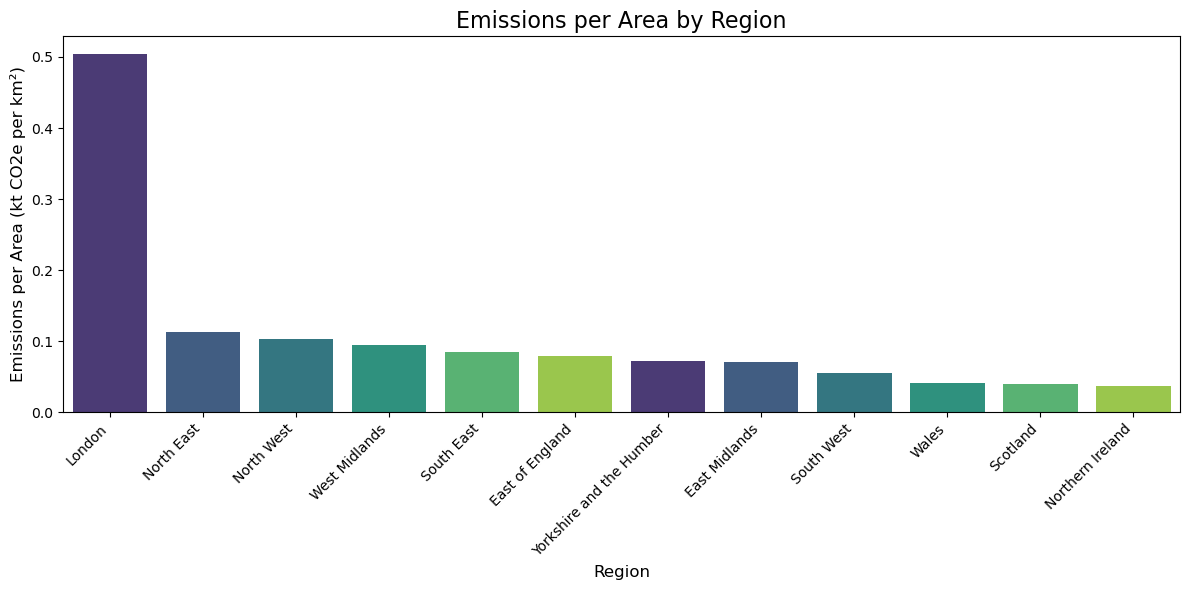

In [67]:
# Create emissions per area variable
df['Emissions per Area (kt CO2e per km²)'] = df['Territorial emissions (kt CO2e)'] / df['Area (km2)']

# Sort regions by mean emissions per area
region_order = df.groupby('Region')['Emissions per Area (kt CO2e per km²)'].mean().sort_values(ascending=False).index

# Visualise emissions per area by region
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='Region',
    y='Emissions per Area (kt CO2e per km²)',
    ci=None,
    palette=sns.color_palette("viridis", as_cmap=False),
    order=region_order
)

plt.title('Emissions per Area by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Emissions per Area (kt CO2e per km²)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()


The correlation between emissions and area reveals a weak positive relationship; as area increases, emissions tend to rise slightly, though not strongly. Normalising emissions by area (emissions per km²) provides deeper insights into the influence of population density and urbanisation. Smaller, densely populated regions like London exhibit significantly higher emissions per km² due to concentrated economic activity, transport infrastructure, and population. In contrast, larger, sparsely populated regions such as Scotland and Northern Ireland have much lower emissions per km² despite their significant total emissions, which are driven by activities like agriculture and energy production. This highlights how emissions are shaped by both geographic and demographic factors.

# Summary

This analysis reveals important insights into the regional distribution of emissions across the UK. Larger, sparsely populated regions such as Scotland and Northern Ireland have relatively lower emissions per km² despite having high total emissions due to agricultural and energy production activities. This is primarily due to their expansive land areas and low population density. In contrast, smaller, densely populated regions like London exhibit higher emissions per km², driven by concentrated economic activity, transport systems, and urbanization. This highlights the critical role of population density and urban planning in shaping emissions patterns.

To address the challenges identified, targeted policies must focus on both urban and rural areas. In urban centres like London, where emissions per area are highest, immediate steps should be taken to reduce emissions through sustainable transport investments (e.g., expanding electric vehicle infrastructure, improving cycling lanes, and public transport), promoting green infrastructure (e.g., green roofs and energy-efficient buildings), and encouraging low-carbon economic practices. These initiatives will help mitigate emissions while supporting economic growth and improving urban livability.

For rural regions like Scotland and Northern Ireland, where emissions per area are lower but total emissions are significant, the focus should be on sector-specific solutions. Key areas for intervention include transitioning to sustainable agricultural practices, supporting renewable energy development (e.g., wind and solar power), and incentivising low-emission technologies in energy production. These strategies will not only reduce emissions but also drive economic diversification, innovation, and job creation in these regions.

Overall, the findings underscore the importance of adopting region-specific solutions that address the unique characteristics and challenges of urban and rural areas. By tailoring policies to the specific drivers of emissions, we can create a more sustainable and equitable transition to a low-carbon future, ensuring that both urban and rural communities play their part in reducing greenhouse gas emissions.

# Challenges 

Throughout this analysis, several challenges were encountered, particularly regarding the variability in data quality and completeness across regions. Missing or inconsistent values, especially for key variables like area and emissions, were common. To address this, I applied data-cleaning techniques, such as imputing reasonable estimates for missing values and excluding problematic entries, ensuring the robustness and reliability of the analysis.

A significant challenge was visualizing complex relationships, such as the weak correlation between total emissions and area. While total emissions alone offered limited insight, normalizing emissions by area revealed clearer trends. This required the creation of a new metric—emissions per km²—using NumPy and Pandas. This metric provided a more meaningful representation of the relationship between geographic size, population density, and emissions. Additionally, grouping regions by mean emissions per area further enhanced the interpretability of the data and informed the visualizations.

Communicating the findings effectively was also challenging, given the nuanced regional differences in emissions patterns. To address this, I focused on developing clear and targeted visualizations, such as bar plots ordered by emissions per area, and linked these findings to actionable policy recommendations. This approach ensured that the analysis not only identified key trends but also provided practical, evidence-based insights for decision-making.

# References

Climate Change Act 2008:
UK Government, 2008. Climate Change Act 2008. [online] Available at: https://www.legislation.gov.uk/ukpga/2008/27/contents [Accessed 2 December 2024].

Climate Change Levy (2001):
UK Government, 2001. Finance Act 2000: Climate Change Levy. [online] Available at: https://www.legislation.gov.uk/ukpga/2000/17/contents [Accessed 2 December 2024].

EU Emissions Trading Scheme:
European Commission, 2024. EU Emissions Trading System (EU ETS). [online] Available at: https://ec.europa.eu/clima/eu-action/eu-emissions-trading-system_en [Accessed 2 December 2024].

Paris Agreement:
United Nations, 2015. Paris Agreement. [online] Available at: https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement [Accessed 2 December 2024].

UK Clean Growth Strategy:
UK Government, 2017. The Clean Growth Strategy: Leading the Way to a Low Carbon Future. [online] Available at: https://www.gov.uk/government/publications/clean-growth-strategy [Accessed 2 December 2024].

Coal phase-out policy:
UK Government, 2021. End of Coal Power in Sight as UK Secures Ambitious Commitments at COP26. [online] Available at: https://www.gov.uk/government/news/end-of-coal-power-in-sight-as-uk-secures-ambitious-commitments-at-cop26 [Accessed 2 December 2024].